<figure>
    
![](https://raw.githubusercontent.com/DiegoAscanio/ace-aula-06/main/img/exemplo-71-resposta-rl.png)
    
<figcaption>Figura 2 - Circuito RL</figcaption>
</figure>

A chave no circuito mostrado na Figura 2 esteve fechada por um longo tempo, antes de ser aberta em \(t = 0\). Determine:

a) \\( i_L(t) \\) para \\( t \geq 0 \\),

b) \\( i_0(t) \\) para \\( t \geq 0^+ \\),

c) \\( v_0(t) \\) para \\( t \geq 0^+ \\),

d) a porcentagem da energia total armazenada no indutor de \\( 2 \, \text{H} \\) que é dissipada no resistor de \\( 10 \, \Omega \\).


**Letra a)**

Para encontrar a equação que descreve a corrente no indutor ao longo do tempo, antes de mais nada precisamos encontrar a resistência equivalente composta por \\( 2 \Omega + 10 \Omega || 40 \Omega \\) dada por:

\\[
\begin{align}
R_{\text{eq}} &= {2 \Omega} + {{1} \over {{{1} \over {10 \Omega}} + {{1} \over {40 \Omega}}}} \therefore \\\\
R_{\text{eq}} &= 2 \Omega + 8 \Omega \therefore \\\\
R_{\text{eq}} &= 10 \Omega
\end{align}
\\]

Considerando que a corrente no indutor é dada por:

\\(I(t) = I(0) e^{- {R \over L} t}\\)

Que \\(I(0) = 20 A\\), \\(R = 10 \Omega\\) e \\(L = 2 H \\)

Logo, 

\\(I(t) = 20 e^{- {5} t}\\)

O gráfico da corrente do indutor em resposta ao estímulo natural é dado por:

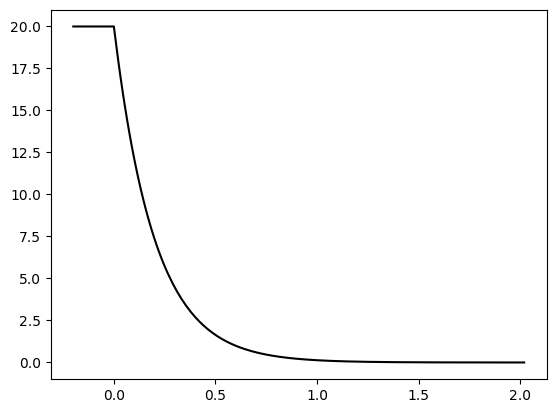

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

t = np.linspace(-0.2, 2.02, 201)
i_neg = np.vectorize(lambda x: 20)(t[t < 0])
i_pos = np.vectorize(lambda x: 20 * np.exp(-5 * x))(t[t >= 0])
i = np.concatenate((i_neg, i_pos))
plt.plot(t, i, 'k')
plt.show()

O enunciado não solicita, mas, também plotaremos a tensão \\(V_{R}\\) que passa pelo resistor: 

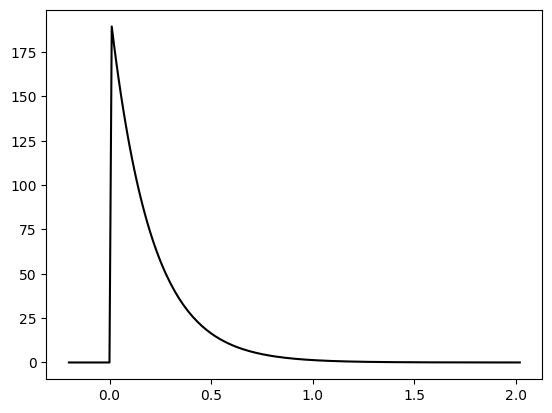

In [12]:
v_neg = np.vectorize(lambda x: 0)(t[t <= 0])
v_pos = 10 * i_pos
v = np.concatenate((v_neg, v_pos))
plt.plot(t, v, 'k')
plt.show()

**Letra b)**

![](https://raw.githubusercontent.com/DiegoAscanio/ace-aula-06/main/img/exemplo-71-resposta-rl.png)

Para encontrar a corrente \\(i_{o}(t)\\) que descreve a corrente no resistor de \\(40 \Omega\\) ao longo do tempo consideramos:

1. Pela LKC nos nós que \\(I_{40 \Omega} + I_{10 \Omega} = I_{R_{\text{eq}}}\\)
2. Pela LKT nas malhas que \\(-40 \Omega \cdot I_{40 \Omega} + 10 \Omega \cdot I_{10 \Omega} = 0\\)

Sabemos que \\(I_{R_{\text{eq}}} = 20 e^{- {5} t}\\), que \\(I_{10 \Omega} = 4 I_{40 \Omega}\\), que \\(I_{40 \Omega} = {I_{R_{\text{eq}}} \over 5} \\) e que \\(I_{40 \Omega} = I_{o}\\).

Assim, a corrente \\(I_{o}(t)\\) em \\(40 \Omega \\) é:

\\[
\begin{align}
I_{o} &= {I_{R_{\text{eq}}} \over 5} \therefore \\\\
I_{o} &= {{20 e^{-5t}} \over 5} \therefore \\\\
I_{o} &= 4 e^{-5t} A
\end{align}
\\]

O gráfico da corrente no resistor é dado por:

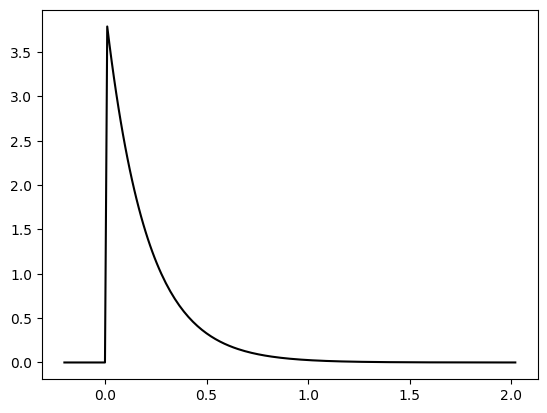

In [13]:
io_neg = np.vectorize(lambda x: 0)(t[t <= 0])
io_pos = np.vectorize(lambda x: 4 * np.exp(-5 * x))(t[t > 0])
io = np.concatenate((io_neg, io_pos))
plt.plot(t, io, 'k')
plt.show()

**Letra c)**

Para encontrar a tensão \\(V_o\\) do resistor de \\(40 \Omega\\), utilizamos a lei de Ohm, que nos ensina que \\(V = Ri\\):

\\[
V_o(t) = 40 \Omega \cdot 4 e^{-5t} A \therefore \\\\
V_o(t) = 160 e^{-5t} V
\\]

O enunciado não solicita, mas, também plotaremos a tensão \\(V_{o}\\) do resistor de \\(40 \Omega\\): 

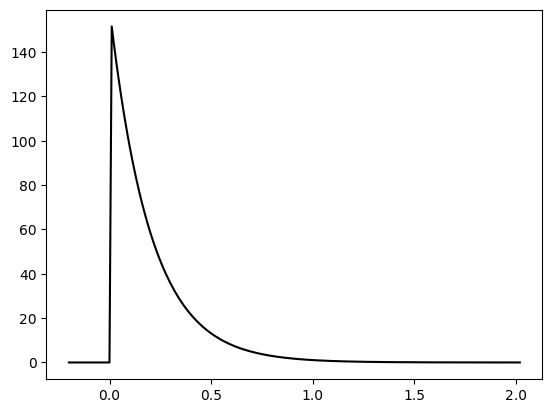

In [14]:
vo_neg = np.vectorize(lambda x: 0)(t[t <= 0])
vo_pos = np.vectorize(lambda x: 160 * np.exp(-5 * x))(t[t > 0])
vo = np.concatenate((vo_neg, vo_pos))
plt.plot(t, vo, 'k')
plt.show()

**Letra d)**

A porcentagem da energia total armazenada no indutor de \\( 2 \, \text{H} \\) que é dissipada no resistor de \\( 10 \, \Omega \\):

Sabemos que a corrente \\(I_{R_{10 \Omega}}\\) do resistor de \\(10 \Omega\\) é dada por:

\\[
\begin{align}
I_{R_{10 \Omega}} &= I_{R_{\text{eq}}} - I_{R_{40 \Omega}} \therefore \\\\
I_{R_{10 \Omega}} &= 20 e^{-5t}A - 4 e^{-5t}A \therefore \\\\
I_{R_{10 \Omega}} &= 16 e^{-5t} A
\end{align}
\\]

Para encontrarmos o percentual de energia dissipado pelo resistor de \\(10 \Omega\\) em relação a energia total dissipada na resistência equivalente do circuito temos que calcular a razão da potência dissipada no resistor de \\(10 \Omega\\) pela potência dissipada em todo o circuito.

**Potência dissipada em \\(10 \Omega\\):**

\\[
\begin{align}
P_{10 \Omega} &= R I_{10 \Omega}^2 \therefore \\\\
P_{10 \Omega} &= 10 \times 256 e^{-10t} = 2.56 e^{-10t} kW.
\end{align}
\\]

**Potência dissipada em \\(R_{\text{eq}}\\):**
\\[
\begin{align}
P_{R_{\text{eq}}} &= R I_{R_{\text{eq}}}^2 \therefore \\\\
P_{R_{\text{eq}}} &= 10 \times 400 e^{-10t} = 4 e^{-10t} kW.
\end{align}
\\]

In [23]:
from IPython.display import display, Markdown, Latex

pretty_result = '''**Percentual da potência dissipada por \\\\(10 \\Omega\\\\) em relação a todo o circuito:**

\\\\[
\\begin{align}
    \\text{Percentual} &= {P_{10 \\Omega} \\over P_{R_{\\text{eq}}}} \\therefore \\\\\\\\'''

pretty_result += '''
    \\text{Percentual} &= {{2.56 e^{-10t} kW} \\over {4 e^{-10t} kW}} \\therefore \\\\\\\\'''

pretty_result += '''
    \\text{Percentual} &= {porcentagem:02d}\\%
'''.format(Percentual = '{Percentual}', porcentagem = int(2.56/4 * 100))

pretty_result += '''\\end{align}
\\\\]
'''
display(Markdown(pretty_result))

**Percentual da potência dissipada por \\(10 \Omega\\) em relação a todo o circuito:**

\\[
\begin{align}
    \text{Percentual} &= {P_{10 \Omega} \over P_{R_{\text{eq}}}} \therefore \\\\
    \text{Percentual} &= {{2.56 e^{-10t} kW} \over {4 e^{-10t} kW}} \therefore \\\\
    \text{Percentual} &= 64\%
\end{align}
\\]
